# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math
import dill
%load_ext memory_profiler

expected = dill.load(open('expected','rb'))

results_bisection = expected['bisection']
f = results_bisection[12][2]
a = results_bisection[12][1]

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

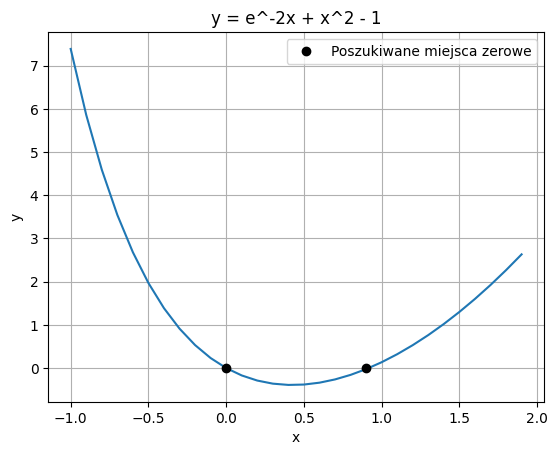

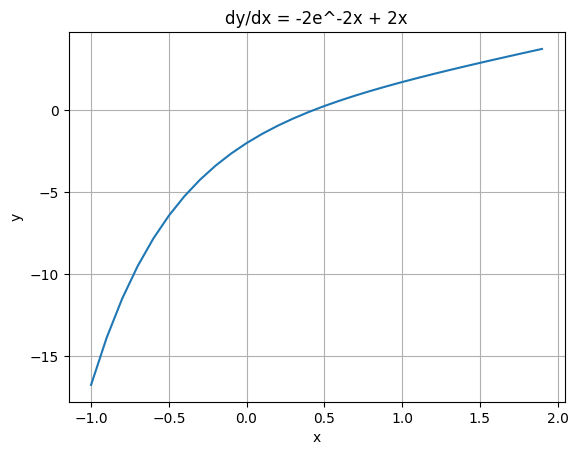

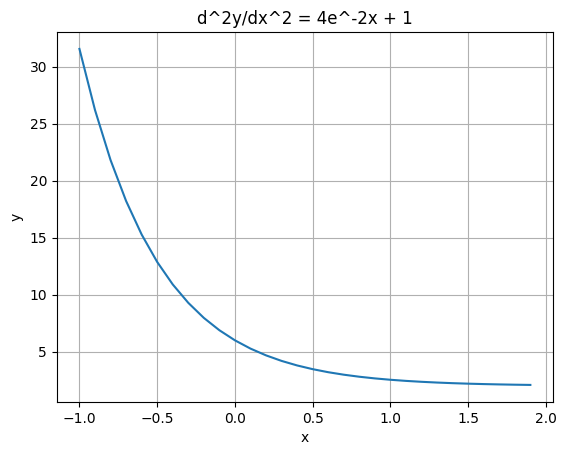

In [2]:
domain = np.arange(-1, 2, 0.1)

plt.plot(domain, main.fun(domain))
plt.plot([0, 0.9], [0, 0], 'ko', label='Poszukiwane miejsca zerowe')
plt.xlabel(xlabel='x')
plt.ylabel(ylabel='y')
plt.title(label='y = e^-2x + x^2 - 1')
plt.legend()
plt.grid()
plt.show()

domain = np.arange(-1, 2, 0.1)

plt.plot(domain, main.dfun(domain))
plt.xlabel(xlabel='x')
plt.ylabel(ylabel='y')
plt.title(label='dy/dx = -2e^-2x + 2x')
plt.grid()
plt.show()

domain = np.arange(-1, 2, 0.1)

plt.plot(domain, main.ddfun(domain))
plt.xlabel(xlabel='x')
plt.ylabel(ylabel='y')
plt.title(label='d^2y/dx^2 = 4e^-2x + 1')
plt.grid()
plt.show()

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [3]:
x_root = scipy.optimize.root(main.fun, [0, 1])
x_fsolve = scipy.optimize.fsolve(main.fun, [0, 1])

***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

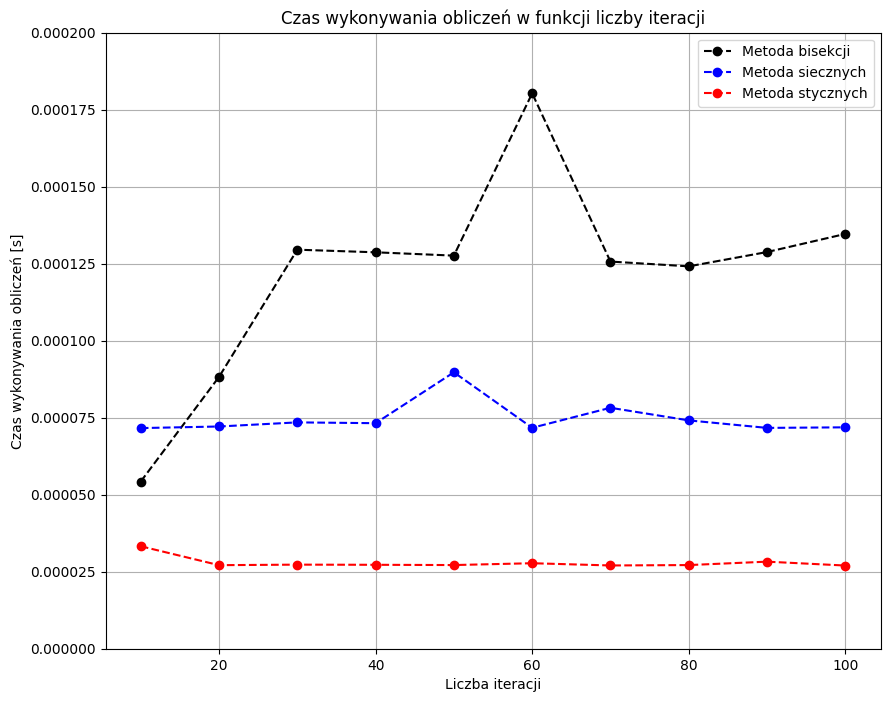

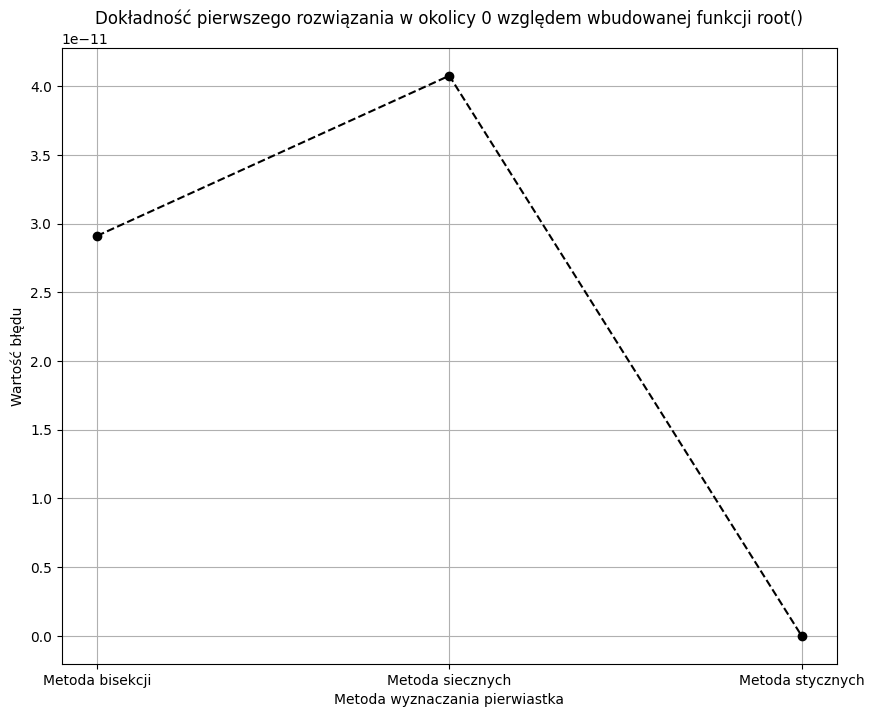

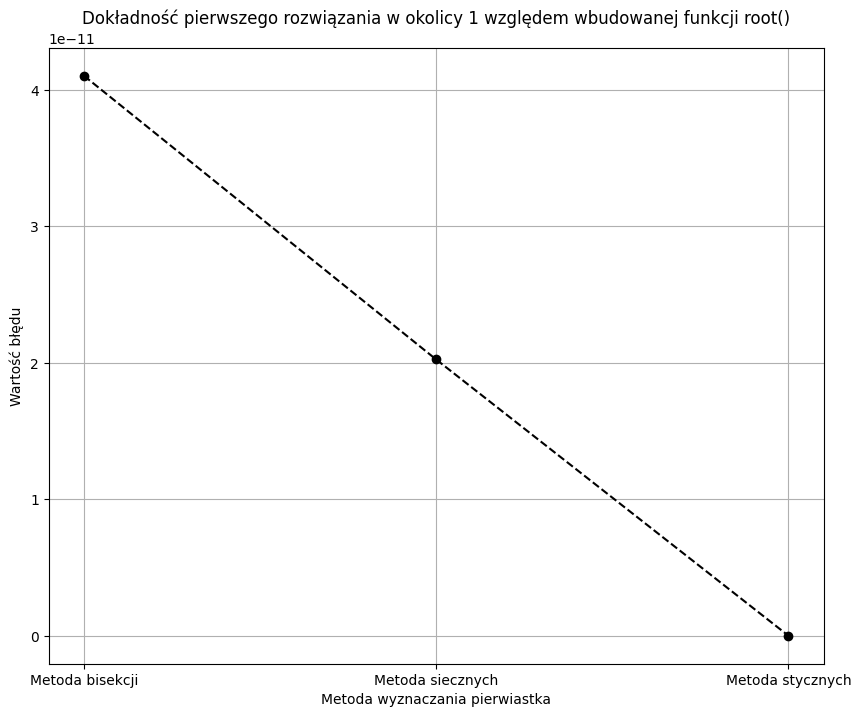

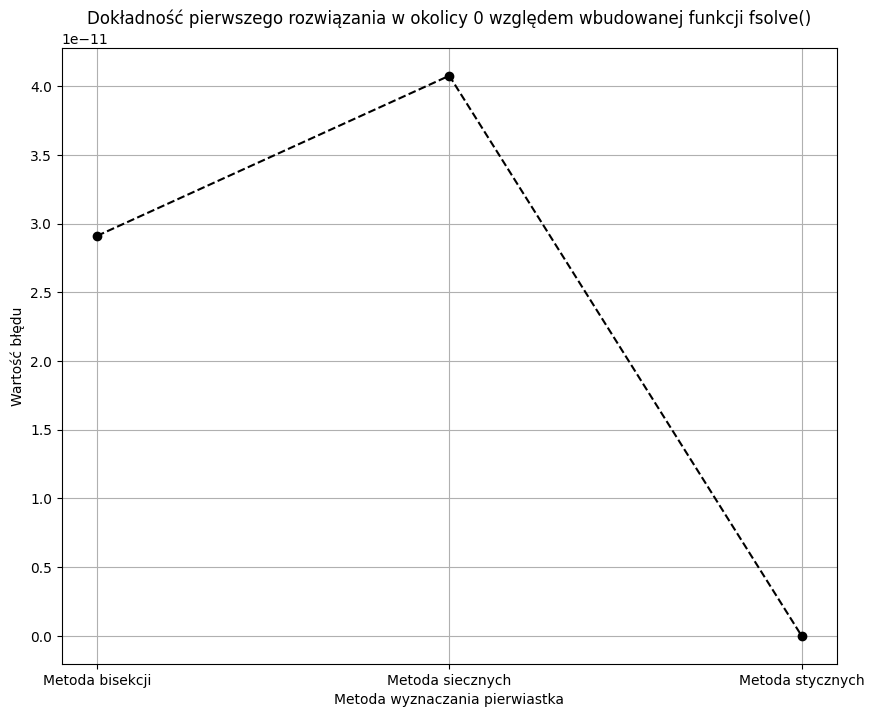

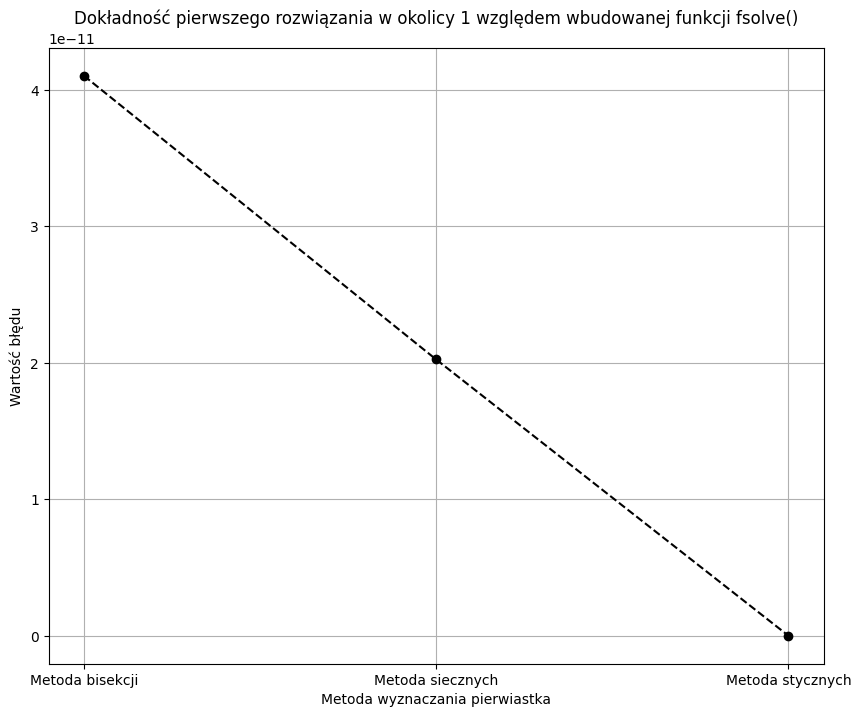

In [4]:
epsilon = 1e-10
iterations = [10*i for i in range(1, 11)]
times_bisection = []
times_secant = []
times_newton = []

for iteration in iterations:
    time = %timeit -r 5 -n 5 -o -q main.bisection(-1, 0.5, main.fun, epsilon, iteration)
    times_bisection.append(time.average)
    time = %timeit -r 5 -n 5 -o -q main.secant(-0.02, 0.01, main.fun, epsilon, iteration)
    times_secant.append(time.average)
    time =  %timeit -r 5 -n 5 -o -q main.newton(main.fun, main.dfun, main.ddfun, -0.2, 0.1, epsilon, iteration)
    times_newton.append(time.average)

plt.figure(figsize=(10, 8))
plt.plot(iterations, times_bisection, 'ko--', label='Metoda bisekcji')
plt.plot(iterations, times_secant, 'bo--', label='Metoda siecznych')
plt.plot(iterations, times_newton, 'ro--', label='Metoda stycznych')
plt.grid(which='both')
plt.title(label='Czas wykonywania obliczeń w funkcji liczby iteracji')
plt.xlabel(xlabel='Liczba iteracji')
plt.ylabel(ylabel='Czas wykonywania obliczeń [s]')
plt.ylim((0, 0.0002))
plt.legend()
plt.show()

xticks = ['Metoda bisekcji', 'Metoda siecznych', 'Metoda stycznych']

x_bisection_1, nr_of_iterations_bisection_1 = main.bisection(-1, 0.5, main.fun, epsilon, 100)
x_bisection_2, nr_of_iterations_bisection_2 = main.bisection(0.5, 1, main.fun, epsilon, 100)
error_bisection_root_1 = np.abs(x_bisection_1-x_root.x[0])
error_bisection_root_2 = np.abs(x_bisection_2-x_root.x[1])
error_bisection_fsolve_1 = np.abs(x_bisection_1-x_fsolve[0])
error_bisection_fsolve_2 = np.abs(x_bisection_2-x_fsolve[1])

x_secant_1, nr_of_iterations_secant_1 = main.secant(-1, 0.5, main.fun, epsilon, 100)
x_secant_2, nr_of_iterations_secant_2 = main.secant(0.5, 1, main.fun, epsilon, 100)
error_secant_root_1 = np.abs(x_secant_1-x_root.x[0])
error_secant_root_2 = np.abs(x_secant_2-x_root.x[1])
error_secant_fsolve_1 = np.abs(x_secant_1-x_fsolve[0])
error_secant_fsolve_2 = np.abs(x_secant_2-x_fsolve[1])

x_newton_1, nr_of_iterations_newton_1 = main.newton(main.fun, main.dfun, main.ddfun, -0.2, 0.1, epsilon, 100)
x_newton_2, nr_of_iterations_newton_2 = main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, epsilon, 100)
error_newton_root_1 = np.abs(x_newton_1-x_root.x[0])
error_newton_root_2 = np.abs(x_newton_2-x_root.x[1])
error_newton_fsolve_1 = np.abs(x_newton_1-x_fsolve[0])
error_newton_fsolve_2 = np.abs(x_newton_2-x_fsolve[1])

errors_around_0_compared_to_root = [error_bisection_root_1, error_secant_root_1, error_newton_root_1]
plt.figure(figsize=(10, 8))
plt.plot(xticks, errors_around_0_compared_to_root, 'ko--')
plt.title(label='Dokładność pierwszego rozwiązania w okolicy 0 względem wbudowanej funkcji root()')
plt.xlabel(xlabel='Metoda wyznaczania pierwiastka')
plt.ylabel(ylabel='Wartość błędu')
plt.grid()
plt.show()

errors_around_1_compared_to_root = [error_bisection_root_2, error_secant_root_2, error_newton_root_2]
plt.figure(figsize=(10, 8))
plt.plot(xticks, errors_around_1_compared_to_root, 'ko--')
plt.title(label='Dokładność pierwszego rozwiązania w okolicy 1 względem wbudowanej funkcji root()')
plt.xlabel(xlabel='Metoda wyznaczania pierwiastka')
plt.ylabel(ylabel='Wartość błędu')
plt.grid()
plt.show()

errors_around_0_compared_to_fsolve = [error_bisection_fsolve_1, error_secant_fsolve_1, error_newton_fsolve_1]
plt.figure(figsize=(10, 8))
plt.plot(xticks, errors_around_0_compared_to_fsolve, 'ko--')
plt.title(label='Dokładność pierwszego rozwiązania w okolicy 0 względem wbudowanej funkcji fsolve()')
plt.xlabel(xlabel='Metoda wyznaczania pierwiastka')
plt.ylabel(ylabel='Wartość błędu')
plt.grid()
plt.show()

errors_around_1_compared_to_fsolve = [error_bisection_fsolve_2, error_secant_fsolve_2, error_newton_fsolve_2]
plt.figure(figsize=(10, 8))
plt.plot(xticks, errors_around_1_compared_to_fsolve, 'ko--')
plt.title(label='Dokładność pierwszego rozwiązania w okolicy 1 względem wbudowanej funkcji fsolve()')
plt.xlabel(xlabel='Metoda wyznaczania pierwiastka')
plt.ylabel(ylabel='Wartość błędu')
plt.grid()
plt.show()


Laboratorium pozwoliło zapoznać mi się ze sposobami znajdowania pierwiastków równań nieliniowych. Po analizie czasowej oraz jakościowej rozwiązań najlepszą metodą okazała się metoda stycznych czyli metoda Newtona. Wykonuje obliczenia najszybciej dodatkowo gwarantując najlepszą dokładność. Dodatkowo utrwaliłem umiejętności dotyczące wizualizacji danych na wykresach przy pomocy biblioteki matplotlib.pyplot.